# Logistic Regression

`Logistic regression` is a `classification algorithm` used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a probability value which can then be mapped to two or more discrete classes.

Logistic regression can be used for:

- Binary Classification
- Multi-class Classification
- One-vs-Rest Classification

## Assumptions of Logistic regression

1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [3]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler  , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report , precision_score , recall_score , f1_score

In [23]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### preprocessing the data

In [24]:
# droping the deck column

df.drop(columns='deck' ,axis = 1, inplace = True)

# impute the missing values with median

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# impute the missing values with mode

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [26]:
# encode the categorical variables using for loop

for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [28]:
# X and y column

X = df.drop('survived' , axis = 1)
y = df['survived']

In [29]:
# train test split the data

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )


In [30]:
# model calling

model = LogisticRegression()

In [31]:
# train the model

model.fit(X_train , y_train)

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# predict the model

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0])

In [35]:
# evaluating the model

print('Recall Score :',recall_score(y_test , y_pred))
print('F1 Score :',f1_score(y_test , y_pred))
print('Acurracy Score :',accuracy_score(y_test , y_pred))
print('Precision Score :',precision_score(y_test , y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test , y_pred))
print('Classification Report : \n',classification_report(y_test , y_pred))




Recall Score : 1.0
F1 Score : 1.0
Acurracy Score : 1.0
Precision Score : 1.0
Confusion Matrix : 
 [[102   0]
 [  0  77]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        77

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



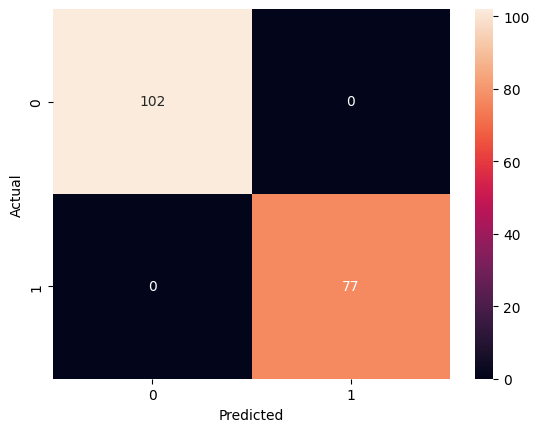

In [37]:
# plot the confusion matrix

cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot = True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()